In [27]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
# Đọc dữ liệu từ iris.csv vào dataframe
iris_df = pd.read_csv("IRIS.csv")
iris_test = iris_df[iris_df.columns[0:4]]
iris_test

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
# gán số cụm
kmeans = KMeans(n_clusters=3)

# Áp dụng thuật toán KMeans để tìm ra các cụm
kmeans.fit(iris_test)

KMeans(n_clusters=3)

In [29]:

labels = kmeans.labels_
print(labels)

center = kmeans.cluster_centers_
print(center)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


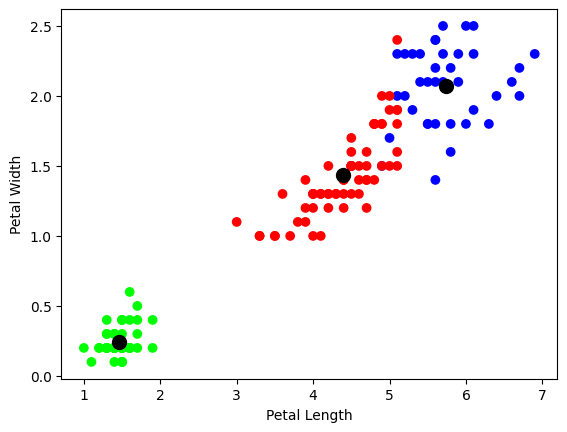

In [30]:

colors = np.array(['#FF0000', '#00FF00', '#0000FF'])
plt.scatter(iris_df['petal_length'], iris_df['petal_width'], c=colors[labels])
plt.scatter(center[:, 2], center[:, 3], marker='o', s=100, c='#000000')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

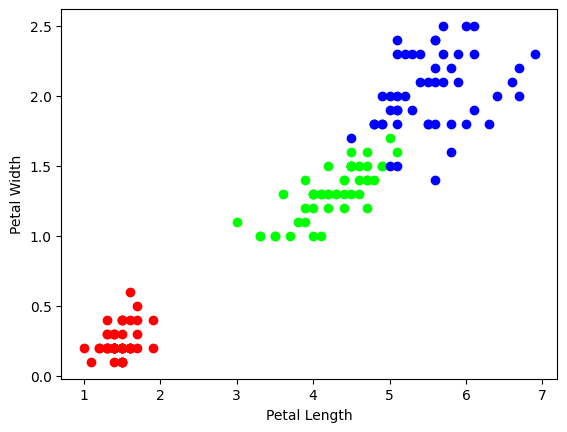

In [31]:
# Tìm các giá trị khác nhau trong thuộc tính species
unique_species = iris_df['species'].unique()

# Tạo một mảng màu sắc tương ứng với các giá trị khác nhau
colors = np.array(['#FF0000', '#00FF00', '#0000FF'])

# Vẽ biểu đồ với màu khác nhau cho các loài hoa iris khác nhau
for i in range(len(unique_species)):
    species = unique_species[i]
    species_df = iris_df[iris_df['species'] == species]
    plt.scatter(species_df['petal_length'], species_df['petal_width'], c=colors[i])

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


In [32]:
iris_setosa=iris_df.loc[iris_df["species"]=="Iris-setosa"]
iris_virginica=iris_df.loc[iris_df["species"]=="Iris-virginica"]
iris_versicolor=iris_df.loc[iris_df["species"]=="Iris-versicolor"]

species_map = {'Iris-setosa': 1, 'Iris-versicolor': 0, 'Iris-virginica': 2}
species_array = iris_df['species'].map(species_map).values
species_array

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(labels, species_array.T)

0.8933333333333333